In [1]:
# load packages
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import zero_one_loss 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
import xgboost as xgb
import matplotlib.pyplot as plt

/Users/nihaozheng/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ocr = loadmat('hw4data.mat')

In [3]:
data = ocr['data']
label = ocr['labels']

In [4]:
# split train/test 
n = data.shape[0]
X_train = data[:int(0.75*n),]
y_train = label[:int(0.75*n),].reshape(-1)
X_test = data[int(0.75*n):,]
y_test = label[int(0.75*n):,].reshape(-1)

In [5]:
#standardization
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
scalar.fit(X_test)
X_test = scalar.transform(X_test)

In [6]:
# Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
pred=lasso.predict(X_train)
print("The training error is {}".format(mean_squared_error(y_train,pred)))
pred=lasso.predict(X_test)
print("The testing error is {}".format(mean_squared_error(y_test,pred)))




The training error is 0.5077015753421515
The testing error is 0.5066024081574544


In [7]:
# random forest with default parameters
forest_reg = RandomForestRegressor(n_jobs=-1)
forest_reg.fit(X_train,y_train)
pred=forest_reg.predict(X_train)
print("The training error is{}".format(mean_squared_error(y_train,pred)))
pred=forest_reg.predict(X_test)
print("The testing error is{}".format(mean_squared_error(y_test,pred)))





The training error is0.08531778971354166
The testing error is0.4704254150390625


In [8]:
# manually set parameters in random forest
forest_reg = RandomForestRegressor(max_depth=20,n_estimators=20,n_jobs=-1)
forest_reg.fit(X_train,y_train)
pred=forest_reg.predict(X_train)
print("The training error is{}".format(mean_squared_error(y_train,pred)))
pred=forest_reg.predict(X_test)
print("The testing error is{}".format(mean_squared_error(y_test,pred)))






The training error is0.19355541555357858
The testing error is0.43057518095108716


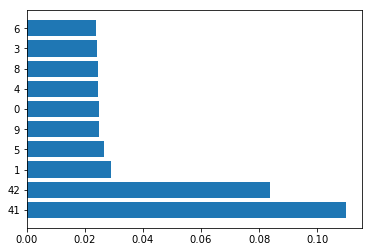

In [9]:
# plot feature importance 
temp ={'feature':range(X_test.shape[1]),'importance':list(forest_reg.feature_importances_)}
temp = pd.DataFrame(temp)
temp=temp.sort_values(by='importance',ascending=False)
x_pos = np.arange(10)
plt.barh(x_pos,temp['importance'][:10])
plt.yticks(x_pos, temp['feature'][:10])
plt.show()

In [10]:
# use top 20 features in random forest
feature = temp['feature'][:20]
forest_reg.fit(pd.DataFrame(X_train)[feature],y_train)
pred=forest_reg.predict(pd.DataFrame(X_train)[feature])
print("The training error is{}".format(mean_squared_error(y_train,pred)))
pred=forest_reg.predict(pd.DataFrame(X_test)[feature])
print("The testing error is{}".format(mean_squared_error(y_test,pred)))




The training error is0.17766991808943614
The testing error is0.4282914074440784


# part(c)

In [12]:
quiz = ocr['quiz']

In [33]:
pred=forest_reg.predict(pd.DataFrame(quiz)[feature])

In [38]:
eta = (1+pred)/2

In [46]:
print("All eta are between 0 and 1: {}".format(sum(eta > 1)==0 and sum(eta < 0)==0))

All eta are between 0 and 1: True


In [48]:
p_Q = np.mean(eta)
p_Q

0.14924339851085194